Stock Price Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import training dataset
dataset_train=pd.read_csv('/Users/apekshagyawali/Desktop/deeplearn/Stock_Price_Train.csv')
training_set= dataset_train.iloc[:, 1:2]. values

In [3]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [5]:
X_train_list = []
y_train_list = []
for i in range(60, 1258):
    X_train_list.append(training_set_scaled[i-60:i, 0])
    y_train_list.append(training_set_scaled[i, 0])

X_train = np.array(X_train_list)
y_train = np.array(y_train_list)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [6]:
#import  keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
#initializing RNN
regressor=Sequential()

In [8]:
#adding first LSTM layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/Users/apekshagyawali/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
#adding second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [10]:
#adding third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True)) 
regressor.add(Dropout(0.2))

In [11]:
#adding fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [13]:
#adding the output layer
regressor.add(Dense(units=1))

In [14]:
#compiling RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#fitting rnn to the training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - loss: 0.0860
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0061
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0052
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0052
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0051
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0056
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0049
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0061
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0046
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0043
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0046
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0037
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0041
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0035
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 

In [16]:
#making the prediction and visualizing the results

dataset_test=pd.read_csv('/Users/apekshagyawali/Desktop/deeplearn/Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:, 1:2].values

In [18]:
#Getting predicted stock price of 2017
dataset_total=pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


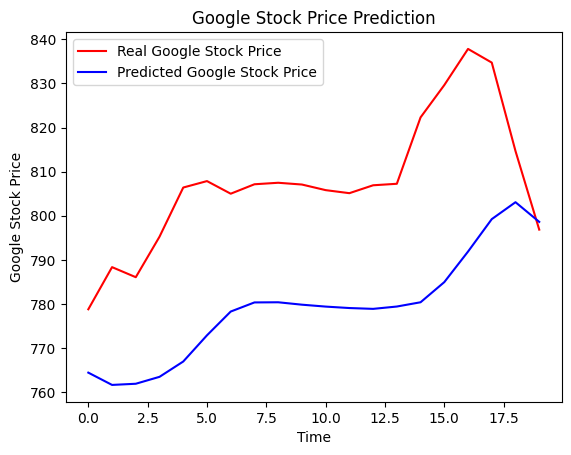

In [19]:
#visualizing results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()